### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [3]:
data = pd.read_csv('data/coupons.csv')

In [4]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [7]:
print(data.describe())

        temperature  has_children  toCoupon_GEQ5min  toCoupon_GEQ15min  \
count  12684.000000  12684.000000           12684.0       12684.000000   
mean      63.301798      0.414144               1.0           0.561495   
std       19.154486      0.492593               0.0           0.496224   
min       30.000000      0.000000               1.0           0.000000   
25%       55.000000      0.000000               1.0           0.000000   
50%       80.000000      0.000000               1.0           1.000000   
75%       80.000000      1.000000               1.0           1.000000   
max       80.000000      1.000000               1.0           1.000000   

       toCoupon_GEQ25min  direction_same  direction_opp             Y  
count       12684.000000    12684.000000   12684.000000  12684.000000  
mean            0.119126        0.214759       0.785241      0.568433  
std             0.323950        0.410671       0.410671      0.495314  
min             0.000000        0.000000     

In [8]:
data.isnull().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

In [9]:
print (data.dtypes)

destination             object
passanger               object
weather                 object
temperature              int64
time                    object
coupon                  object
expiration              object
gender                  object
age                     object
maritalStatus           object
has_children             int64
education               object
occupation              object
income                  object
car                     object
Bar                     object
CoffeeHouse             object
CarryAway               object
RestaurantLessThan20    object
Restaurant20To50        object
toCoupon_GEQ5min         int64
toCoupon_GEQ15min        int64
toCoupon_GEQ25min        int64
direction_same           int64
direction_opp            int64
Y                        int64
dtype: object


3. Decide what to do about your missing data -- drop, replace, other...

In [ ]:
# most of the columns that are unnecessary have missing data so will keep as is

4. What proportion of the total observations chose to accept the coupon? 



In [10]:
proportion = data.groupby('Y')['Y'].size() / len(data)
print(proportion)

Y
0    0.431567
1    0.568433
Name: Y, dtype: float64


In [ ]:
#57% chose to accept the coupon

5. Use a bar plot to visualize the `coupon` column.

coupon
Coffee House             3996
Restaurant(<20)          2786
Carry out & Take away    2393
Bar                      2017
Restaurant(20-50)        1492
Name: count, dtype: int64


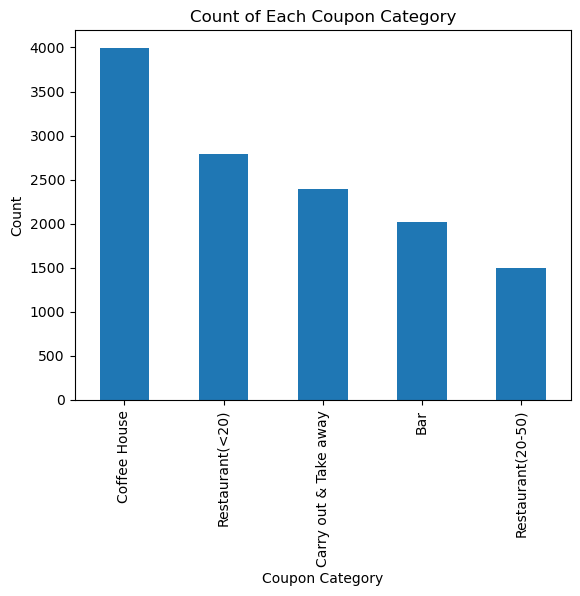

In [11]:
# created a bar plot to count the coupon categories

coupon_cat = data['coupon'].value_counts()
print(coupon_cat)
coupon_cat.plot(kind='bar')
plt.xlabel('Coupon Category')
plt.ylabel('Count')
plt.title('Count of Each Coupon Category')
plt.show()

6. Use a histogram to visualize the temperature column.

<Axes: ylabel='Frequency'>

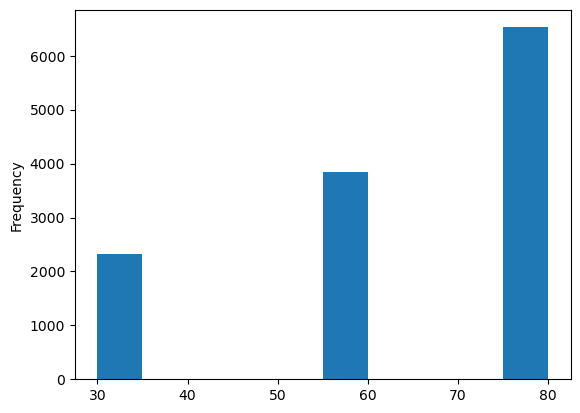

In [12]:
data['temperature'].plot.hist()


**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [14]:
bar_coupon_df = data['Bar']
print (bar_coupon_df.describe())

count     12577
unique        5
top       never
freq       5197
Name: Bar, dtype: object


2. What proportion of bar coupons were accepted?


In [15]:
proportion = data.groupby('coupon')['coupon'].size() / len(data)
print(proportion)

coupon
Bar                      0.159019
Carry out & Take away    0.188663
Coffee House             0.315043
Restaurant(20-50)        0.117629
Restaurant(<20)          0.219647
Name: coupon, dtype: float64


In [ ]:
# 16% of bar coupons were accepted

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [16]:
#dataframe showing bar information
bar_coupon_df = data[data['coupon'] == 'Bar']

print(bar_coupon_df.head())

        destination  passanger weather  temperature  time coupon expiration  \
9   No Urgent Place     Kid(s)   Sunny           80  10AM    Bar         1d   
13             Home      Alone   Sunny           55   6PM    Bar         1d   
17             Work      Alone   Sunny           55   7AM    Bar         1d   
24  No Urgent Place  Friend(s)   Sunny           80  10AM    Bar         1d   
35             Home      Alone   Sunny           55   6PM    Bar         1d   

    gender age      maritalStatus  ...  CoffeeHouse CarryAway  \
9   Female  21  Unmarried partner  ...        never       NaN   
13  Female  21  Unmarried partner  ...        never       NaN   
17  Female  21  Unmarried partner  ...        never       NaN   
24    Male  21             Single  ...        less1       4~8   
35    Male  21             Single  ...        less1       4~8   

   RestaurantLessThan20 Restaurant20To50 toCoupon_GEQ5min toCoupon_GEQ15min  \
9                   4~8              1~3               

In [18]:
#compare bar acceptance with 3 or fewer vs more than 3

three_or_fewer = bar_coupon_df[bar_coupon_df['Bar'].isin(['never', 'less than once a month', '1-3 times a month'])]
more_than_three = bar_coupon_df[~bar_coupon_df['Bar'].isin(['never', 'less than once a month', '1-3 times a month'])]

acceptance_rate_three_or_fewer = three_or_fewer['Y'].mean()
acceptance_rate_more_than_three = more_than_three['Y'].mean()

print("3 or fewer times a month = ", acceptance_rate_three_or_fewer)
print("those who went more = ", acceptance_rate_more_than_three)


3 or fewer times a month =  0.18795180722891566
those who went more =  0.565290648694187


In [ ]:
#according to our data, the bar coupon was accepted more than three times a month = ~57%

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [25]:
#dataframe showing age information
age_df = data.groupby(['age'])['Y'].count()/len(data)

print (age_df)



age
21         0.209161
26         0.201750
31         0.160754
36         0.103989
41         0.086172
46         0.054084
50plus     0.140965
below21    0.043125
Name: Y, dtype: float64


In [31]:
#group using the bar and age >25 once a month vs. those <25

#need to change the type for age and need to force the validation

data['age_'] = pd.to_numeric(data['age'], errors = 'coerce')

over_twentyfive_group = data[(data['Bar'].isin(['4~8', '2~3'])) & (data['age_'] > 25)]
under_twentyfive_group = data[~((data['Bar'].isin(['4~8', '2~3'])) & (data['age_'] > 25))]

acceptance_rate_over_twentyfive_group = over_twentyfive_group['Y'].mean()
acceptance_rate_under_twentyfive_group = under_twentyfive_group['Y'].mean()

print ("Acceptance rate for drivers going to bar more than 1x a month and over age 25 = ", acceptance_rate_over_twentyfive_group)
print ("Acceptance rate for all other drivers going to bar more than 1x a month = ", acceptance_rate_under_twentyfive_group)


Acceptance rate for drivers going to bar more than 1x a month and over age 25 =  0.651925820256776
Acceptance rate for all other drivers going to bar more than 1x a month =  0.5635483601769173


In [ ]:
#The difference is more drivers over 25 have gone to the bar more frequently by just ~10% more than all other drivers

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [34]:
occupations_cat = data['occupation'].value_counts()
                       
print(occupations_cat)

occupation
Unemployed                                   1870
Student                                      1584
Computer & Mathematical                      1408
Sales & Related                              1093
Education&Training&Library                    943
Management                                    838
Office & Administrative Support               639
Arts Design Entertainment Sports & Media      629
Business & Financial                          544
Retired                                       495
Food Preparation & Serving Related            298
Healthcare Practitioners & Technical          244
Healthcare Support                            242
Community & Social Services                   241
Legal                                         219
Transportation & Material Moving              218
Architecture & Engineering                    175
Personal Care & Service                       175
Protective Service                            175
Life Physical Social Science           

In [43]:
#identify how many drivers go bars more than 1x a month (regardless of age)

bar_more_than_once = data['Bar'].isin(['4~8', '1~3'])

#identify how many drivers with no kids and occupations are not farming, fishing, and forestry
passenger_not_a_kid = data['passanger'] != 'Kids(s)'
no_occ_3F = ~data['occupation'].isin(['Farming Fishing & Forestry'])

#combined filter
combined = bar_more_than_once & passenger_not_a_kid & no_occ_3F

#combined filter with acceptance rate
combined_acceptance_rate = data[combined]['Y'].mean()

#everyone else acceptance rate
everyone_acceptance_rate = data['Y'].mean()

print("Acceptance rate for drivers who go to bars more than once, no kids, other occupation = ", combined_acceptance_rate)
print("Acceptance rate for everyone else = ", everyone_acceptance_rate)



Acceptance rate for drivers who go to bars more than once, no kids, other occupation =  0.6266553958861651
Acceptance rate for everyone else =  0.5684326710816777


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [40]:
#group using the bar and age <30 once a month vs. those >30

#need to change the type for age and need to force the validation

data['age_'] = pd.to_numeric(data['age'], errors = 'coerce')

under_thirty_group = data[(data['Bar'].isin(['4~8', '1~3'])) & (data['age_'] < 30)]
over_thirty_group = data[~((data['Bar'].isin(['4~8', '1~3'])) & (data['age_'] > 30))]

acceptance_rate_under_thirty_group = under_thirty_group ['Y'].mean()
acceptance_rate_over_thirty_group = over_thirty_group ['Y'].mean()

print ("Acceptance rate for drivers going to bar more than 1x a month and under 30 = ", acceptance_rate_under_thirty_group)
print ("Acceptance rate for all other drivers going to bar more than 1x a month over 30 = ", acceptance_rate_over_thirty_group)

Acceptance rate for drivers going to bar more than 1x a month and under 30 =  0.6349771225216065
Acceptance rate for all other drivers going to bar more than 1x a month over 30 =  0.5629494844467551


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [ ]:
Based on the information we analyzed above, the highest acceptance rates were with drivers over 25 with no kids. 

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [44]:
#this independent investigation will explore Carry Out & Take Away
#would like to compare the acceptance rate for drivers with no kids visiting carry out & take aways more than 3x a month 
#versus everyone else

coupon_carryaway = data['CarryAway'].value_counts()
print(coupon_carryaway)

CarryAway
1~3      4672
4~8      4258
less1    1856
gt8      1594
never     153
Name: count, dtype: int64


In [45]:
passenger = data['passanger'].value_counts()
print(passenger)

passanger
Alone        7305
Friend(s)    3298
Partner      1075
Kid(s)       1006
Name: count, dtype: int64


In [63]:
#how many drivers visit carry out and takeaways more than 3x a month
carryout_more_than_threetimes = data['CarryAway'].isin(['4~8', 'gt8'])

#identify how many drivers with kids 
passenger_not_a_kid = data['passanger'] != 'Kids(s)'

#combined filter
combined_with_no_kid = carryout_more_than_threetimes & passenger_not_a_kid 

#combined filter with acceptance rate
no_kid_acceptance_rate = data[combined_with_no_kid]['Y'].mean()

print("Acceptance rate for drivers who go to bars more than 3x a month and no kids = ", no_kid_acceptance_rate)


Acceptance rate for drivers who go to bars more than 3x a month and no kids =  0.5789473684210527


In [ ]:
#In exploring the data, I wanted to analyze the acceptance rate for drivers with no kids and a carryout coupon used at 
#least 3x a month against everyone else
# Feeding kids is expensive so it makes sense that drivers with no kids tend to eat out more, according to the data 
#that is ~58%